# 第４回 機械学習 前処理、最適化 

## 4-1. ライブラリー、ファイル読み込み、学習・評価データの作成

In [1]:
# OS（オペレーティングシステム）に依存した機能を使うための標準ライブラリ
import os
#os.getcwd() # 現在のディレクトリを返す

In [2]:
# Library の読み込み
import sys # Pythonのインタプリタや実行環境に関する情報を扱うためのライブラリ
import pandas as pd # データを扱うための標準的なライブラリ
import numpy as np # 多次元配列を扱う数値演算ライブラリ
import scipy as sp # 高度な科学計算を行うためのライブラリ
import sklearn # 機械学習のライブラリ
import matplotlib.pyplot as plt # グラフを描画するライブラリ
%matplotlib inline
# jupyter内に描画

In [3]:
# フルデータCSVファイルの読み込み（欠損値なし）
df = pd.read_csv("data/pulsar_stars.csv") # df = data frame の略
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df.shape # pandas の dataframe の行と列の表示

(17898, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
# DataFrame.iloc[:,A:B] --> pandas のデータフレームの列を取り出す
# https://qiita.com/osk_kamui/items/0a164ec002ff6d8798ca

X = df.iloc[:,0:8].values  # 説明変数
y = df.iloc[:,8].values    # 目的変数

In [7]:
# 訓練用と検証用のデータセット作成
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
# データセットが大きいので  test_set=0.2 で充分検証データが確保できる

X_train.shape, y_train.shape, X_val.shape , y_val.shape

((14318, 8), (14318,), (3580, 8), (3580,))

In [8]:
# 標準化後の目的変数の表示
print("-------------------------------------------------------------------------")
print("訓練用説明変数(X_train): 標準化された数字")
print("-------------------------------------------------------------------------")
print(X_train[0:3])
print("-------------------------------------------------------------------------")
print("訓練用目的変数(y_train): ラベルの[0, 1]")
print("-------------------------------------------------------------------------")
print(y_train[0:200])
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
訓練用説明変数(X_train): 標準化された数字
-------------------------------------------------------------------------
[[ 1.20640625e+02  4.78429616e+01  2.57962577e-01 -9.06199080e-02
   8.04849498e+00  3.51982345e+01  4.81978426e+00  2.35283829e+01]
 [ 1.16554688e+02  4.87029915e+01  1.97625250e-01  2.32600230e-01
   3.04180602e+00  1.66106785e+01  8.16618510e+00  8.48467094e+01]
 [ 6.67734375e+01  5.82062892e+01  1.83873406e+00  2.41493918e+00
   7.36438127e+01  8.06734938e+01  6.49639086e-01 -9.18078374e-01]]
-------------------------------------------------------------------------
訓練用目的変数(y_train): ラベルの[0, 1]
-------------------------------------------------------------------------
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 

## 4-2. データセットの評価（相関、PCA)

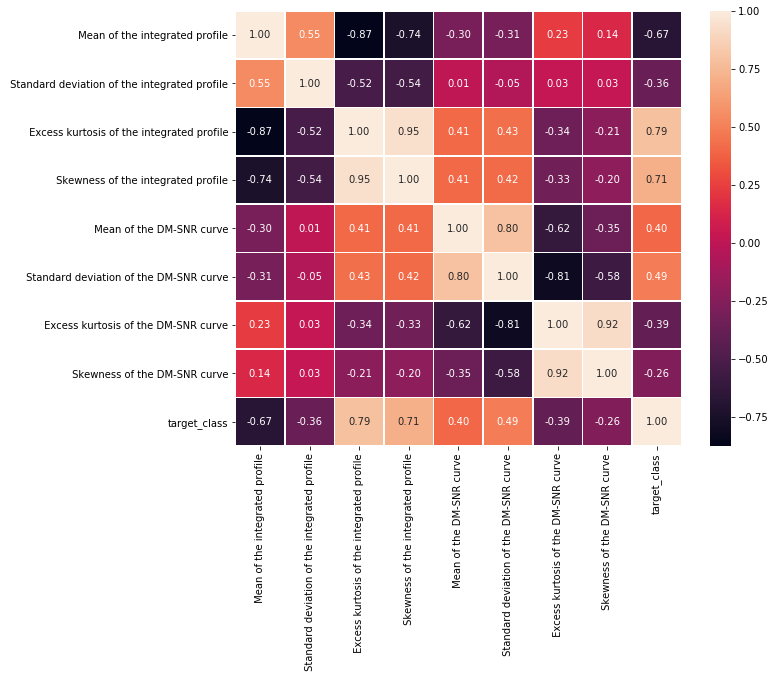

In [9]:
# 相関マトリックスの計算
corr = df.corr()

# ヒートマップのプロット
import seaborn as sns
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True,fmt='.2f',  # 係数の表示（小数点２位まで）
        linewidths=.75)

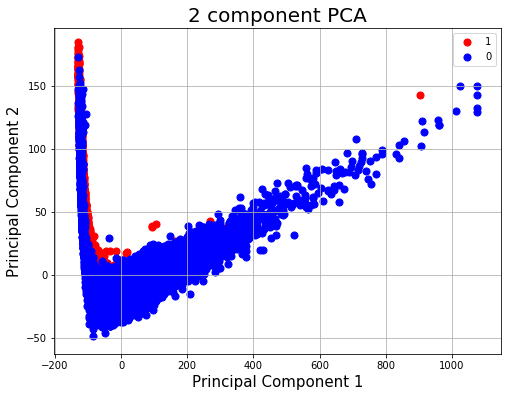

In [10]:
# 目的変数の主成分分析

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target_class']]], axis = 1)

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r',  'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target_class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<Figure size 720x576 with 0 Axes>

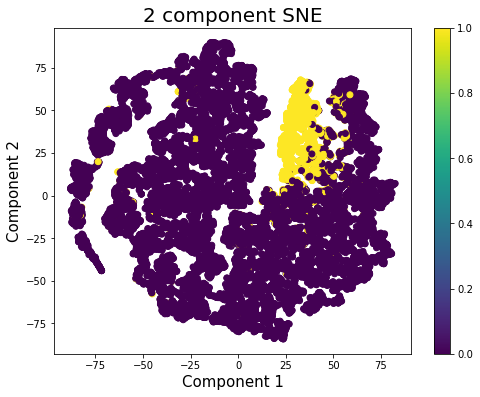

In [12]:
from sklearn.manifold import TSNE

X_reduced = TSNE(n_components=2, random_state=0).fit_transform(df)

fig = plt.figure(figsize = (10,8))
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component SNE', fontsize = 20)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df.target_class)
plt.colorbar()

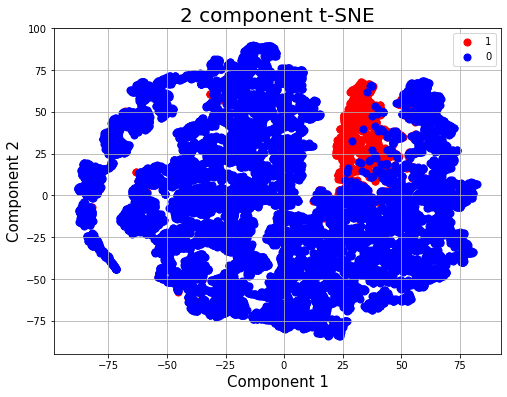

In [19]:
from sklearn.manifold import TSNE

X_reduced = TSNE(n_components=2, random_state=0).fit_transform(df)

principalDf = pd.DataFrame(data = X_reduced
             , columns = ['component 1', 'component 2'])
finalDf = pd.concat([principalDf, df[['target_class']]], axis = 1)

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component t-SNE', fontsize = 20)
targets = [1,0]
colors = ['r',  'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target_class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
               , finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## 4-3. 関数の定義

In [12]:
# 機械学習 → 検証 → 結果表示関数
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
    
def model_fit(clf, X_train, y_train, X_val, y_val): # 同じコードの重複を避けるため、関数を定義
    # モデルの学習
    clf = clf.fit(X_train, y_train)
    # 検証データで予測
    y_pred = pd.DataFrame(clf.predict(X_val))
    
    # confusion matrix（混合行列）表示
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_val, y_pred)
    print(cm)
    acc = clf.score(X_val, y_val)
    # 横軸が予想(predicted)、縦軸が実際(actual)
    print("Open Accuracy:", acc)
    
    # 混合行列の描画
    sns.set()
    cm_rate = cm / cm.sum()
    labels = ["False","True"]
    fig = plt.figure(figsize=(5, 5))
    heatmap = sns.heatmap(
        cm_rate, xticklabels=labels, yticklabels=labels,
        annot=True, fmt='.1%', cbar=True, square=True, cmap='YlGnBu')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    # Generate a classification report
    report = classification_report(y_pred, y_val, target_names=['False','True'])
    print(report)
    return clf

In [13]:
# ROC曲線とAUC（５回交差検証）
# https://www.kaggle.com/ronitf/predicting-heart-disease

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def roc_graph_cv(algo_name,X,y,cvn=5):
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=cvn)
    classifier =algo_name

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train].ravel()).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test].ravel(), probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## 4-4. 分類器の評価

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[3285   21]
 [  40  234]]
Open Accuracy: 0.9829608938547486


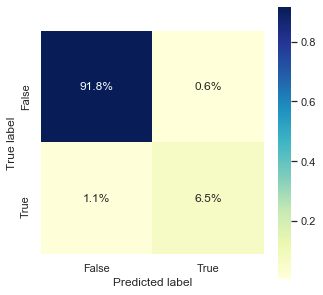

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      3325
        True       0.85      0.92      0.88       255

    accuracy                           0.98      3580
   macro avg       0.92      0.95      0.94      3580
weighted avg       0.98      0.98      0.98      3580



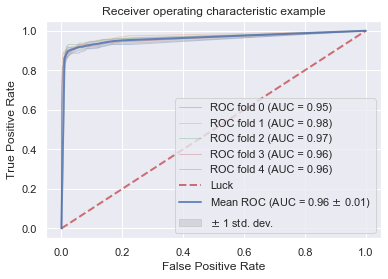

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(min_samples_leaf=3, random_state=0)
clf = model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し
roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し

[[3287   19]
 [  36  238]]
Open Accuracy: 0.9846368715083799


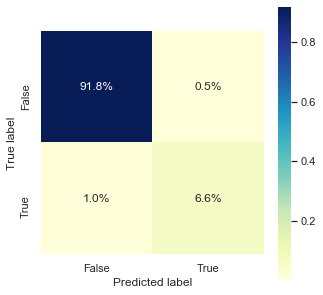

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      3323
        True       0.87      0.93      0.90       257

    accuracy                           0.98      3580
   macro avg       0.93      0.96      0.94      3580
weighted avg       0.99      0.98      0.98      3580



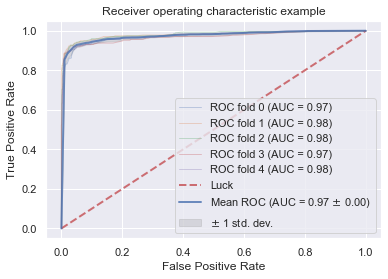

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth=1, min_samples_leaf=55, n_estimators=100)
clf = model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し
roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し

In [16]:
#from sklearn.svm import SVC --> 計算がなかなか収束しないのでスキップ
#clf = SVC(kernel='linear', C=200, cache_size=200, gamma=0.001, tol=0.1, degree=3, 
#          probability=True) # roc_graph_cv() を正常に作動差出るため probability=True に設定                             
#model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し
#roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し

[[3279   27]
 [  48  226]]
Open Accuracy: 0.979050279329609


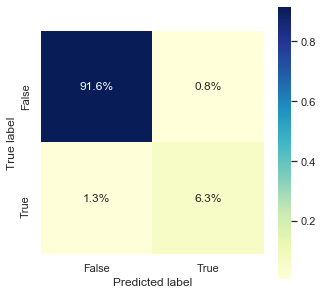

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      3327
        True       0.82      0.89      0.86       253

    accuracy                           0.98      3580
   macro avg       0.91      0.94      0.92      3580
weighted avg       0.98      0.98      0.98      3580



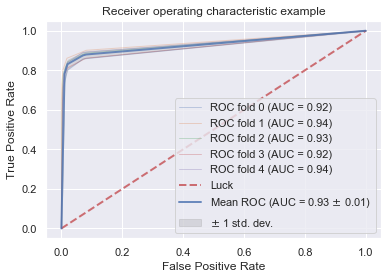

In [28]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(algorithm='brute', leaf_size=30, n_neighbors=5, p=2)
model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し
roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し

## 4-5. Searquential Feature Selector (Forward Selection)

In [29]:
# https://aotamasaki.hatenablog.com/entry/2018/06/14/235157

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# conda install mlxtend は見つからなかった
# 仕方なく pip intall mlxtend でライブラリーをインストール

clf = RandomForestClassifier(min_samples_leaf=3, random_state=0)
sfs1 = SFS(clf, # 使う学習器
           k_features=5, #特徴をいくつまで選択するか
           forward=True, #Trueでforward selectionになる。Falseでback
           floating=False, #後に説明するが、forward selectionの亜種を行うためのもの。
           verbose=2, #実行時のlogをどれだけ詳しく表示するか
           scoring='accuracy', # 評価指標
           cv=5) #クロスバリデーション
            #ちなみにクロスバリデーションをしない(cv=0)とすると、最終的に選ばれる特徴が変わります。

sfs1 = sfs1.fit(X, y)
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245:

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 

{1: {'feature_idx': (2,),
  'cv_scores': array([0.97458101, 0.97597765, 0.97569832, 0.97486034, 0.97624371]),
  'avg_score': 0.9754722060012929,
  'feature_names': ('2',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.97849162, 0.97765363, 0.97905028, 0.97681564, 0.97931805]),
  'avg_score': 0.9782658455927129,
  'feature_names': ('0', '2')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.97681564, 0.97988827, 0.97905028, 0.97793296, 0.97764114]),
  'avg_score': 0.9782656582279667,
  'feature_names': ('0', '1', '2')},
 4: {'feature_idx': (0, 1, 2, 7),
  'cv_scores': array([0.9773743 , 0.98128492, 0.9773743 , 0.97541899, 0.97931805]),
  'avg_score': 0.9781541137491374,
  'feature_names': ('0', '1', '2', '7')},
 5: {'feature_idx': (0, 1, 2, 4, 7),
  'cv_scores': array([0.97625698, 0.98128492, 0.9801676 , 0.97597765, 0.97764114]),
  'avg_score': 0.9782656582279667,
  'feature_names': ('0', '1', '2', '4', '7')}}

[[3286   20]
 [  37  237]]
Open Accuracy: 0.9840782122905027


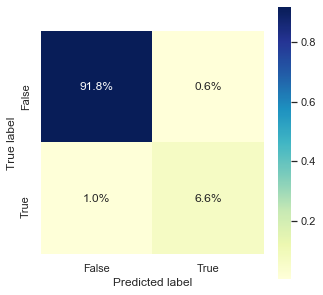

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      3323
        True       0.86      0.92      0.89       257

    accuracy                           0.98      3580
   macro avg       0.93      0.96      0.94      3580
weighted avg       0.98      0.98      0.98      3580



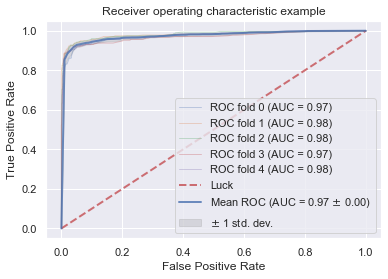

In [31]:
# 上位５変数で機械学習
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth=1, min_samples_leaf=55, n_estimators=100)

currlist =[0, 1, 2, 4, 7]
clf = model_fit(clf, X_train[:,currlist], y_train, X_val[:,currlist], y_val)  # 関数の呼び出し
roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し

## 4-6. 説明変数の重要度のグラフ化

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf = RandomForestClassifier(min_samples_leaf=3, random_state=0)
#clf = GradientBoostingClassifier(max_depth=1, min_samples_leaf=55, n_estimators=100)
# モデルの学習
clf = clf.fit(X, y)

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


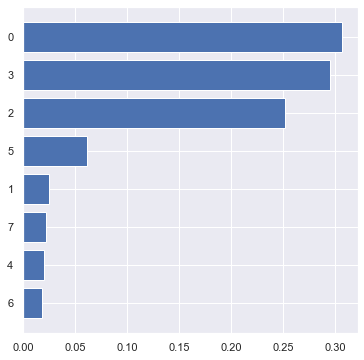

In [33]:
# 説明変数の重要度のグラフ化
import matplotlib.pyplot as plt
%matplotlib inline

# numpy配列から pandas のデータフレームに変換
X_df = pd.DataFrame(X)

features = X_df.columns
importances = clf.feature_importances_ # 説明変数の重要度を抽出
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

[[3286   20]
 [  36  238]]
Open Accuracy: 0.9843575418994414


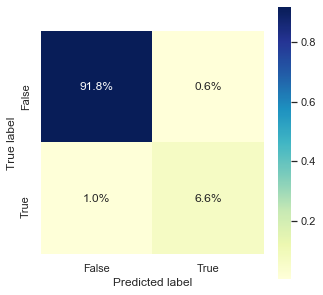

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      3322
        True       0.87      0.92      0.89       258

    accuracy                           0.98      3580
   macro avg       0.93      0.96      0.94      3580
weighted avg       0.98      0.98      0.98      3580



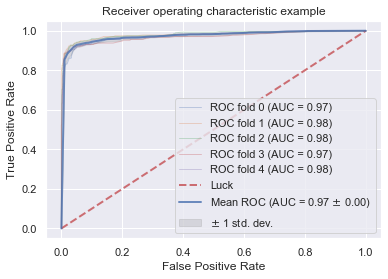

In [34]:
# 上位５変数で機械学習
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth=1, min_samples_leaf=55, n_estimators=100)

currlist =[0, 1, 2, 3, 5]
clf = model_fit(clf, X_train[:,currlist], y_train, X_val[:,currlist], y_val)  # 関数の呼び出し-
roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し

# -----------------------------------------------------------------------------------------------------------

### ★★ データの標準化 ★★

https://helve-python.hatenablog.jp/entry/scikitlearn-scale-conversion

データの平均値と分散を変換する操作を標準化と呼ぶ。平均値を0, 分散を1とすることが多い。
変換操作は以下の式で表される。

Y=X−μσ

ここで、Yは変換後のデータ、Xは変換前のデータである。
また、μ,σは、それぞれXの平均、分散である。
Scikit-learnで標準化は、関数としてはscale, クラスとしてはStandardScalerという名前で用意されている。

https://aizine.ai/preprocessing0614/

スケール変換は個々の特徴量の平均が０、標準偏差が１になるように変換して特徴量を標準正規分布に近似する。多くの機械学習のアルゴリズムにはこのStandardScalerを用いたスケール変換の方が実用的という見方が多いです。というのは平均値０、標準偏差１となるようにスケール変換するということは特徴量が正規分布に従うようになって機械学習アルゴリズムが重みを学習しやすくなる(※)ことを意味する

In [35]:
# DataFrame.iloc[:,A:B] --> pandas のデータフレームの列を取り出す
# https://qiita.com/osk_kamui/items/0a164ec002ff6d8798ca

X = df.iloc[:,0:8].values  # 説明変数
y = df.iloc[:,8].values    # 目的変数

# 説明変数（X)のデータ標準化
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:8])

# ターゲットの列をデータフレームに追加
dfNorm['target_class'] = df['target_class']

# 目的変数(y) と説明変数(X) のデータフレーム作成
X = dfNorm.iloc[:,0:8].values
y = dfNorm.iloc[:,8].values

In [36]:
# 訓練用と検証用のデータセット作成
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, y_train.shape, X_val.shape , y_val.shape

((14318, 8), (14318,), (3580, 8), (3580,))

In [37]:
# 標準化後の目的変数の表示
print("-------------------------------------------------------------------------")
print("訓練用説明変数(X_train): 標準化された数字")
print("-------------------------------------------------------------------------")
print(X_train[0:3])
print("-------------------------------------------------------------------------")
print("訓練用目的変数(y_train): ラベルの[0, 1]")
print("-------------------------------------------------------------------------")
print(y_train[0:200])
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
訓練用説明変数(X_train): 標準化された数字
-------------------------------------------------------------------------
[[ 0.37270291  0.18901511 -0.20666599 -0.30171483 -0.15492309  0.45566034
  -0.77314651 -0.76357273]
 [ 0.21342088  0.31469539 -0.26337347 -0.24930988 -0.32480217 -0.499015
  -0.03048647 -0.18787631]
 [-1.72720073  1.70345765  1.27900755  0.10452128  2.07075395  2.79131483
  -1.69861847 -0.99309205]]
-------------------------------------------------------------------------
訓練用目的変数(y_train): ラベルの[0, 1]
-------------------------------------------------------------------------
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[[3287   19]
 [  36  238]]
Open Accuracy: 0.9846368715083799


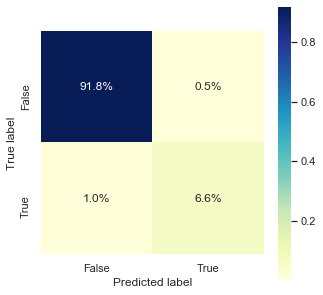

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      3323
        True       0.87      0.93      0.90       257

    accuracy                           0.98      3580
   macro avg       0.93      0.96      0.94      3580
weighted avg       0.99      0.98      0.98      3580



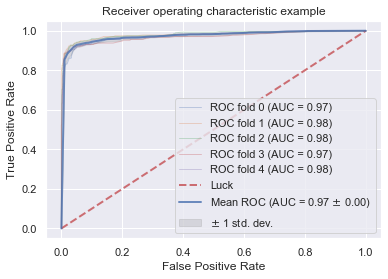

In [38]:
clf = GradientBoostingClassifier(max_depth=1, min_samples_leaf=55, n_estimators=100)
clf = model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し
roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し